### # Decision Trees


In [194]:
import pandas as pd
import numpy as np



In [195]:
hr = pd.read_csv('HR Analytics.csv')

In [55]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [56]:
hr[hr['Attrition']==1]


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,1,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,1,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3
26,32,1,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,1,33,...,2,80,0,10,5,3,10,2,6,7
33,39,1,Travel_Rarely,895,Sales,5,3,Technical Degree,1,42,...,3,80,1,19,6,4,1,0,0,0
34,24,1,Travel_Rarely,813,Research & Development,1,3,Medical,1,45,...,1,80,1,6,2,2,2,0,2,0
36,50,1,Travel_Rarely,869,Sales,3,2,Marketing,1,47,...,3,80,0,3,2,3,3,2,0,2
42,26,1,Travel_Rarely,1357,Research & Development,25,3,Life Sciences,1,55,...,3,80,0,1,2,2,1,0,0,1


In [5]:
hr[hr['Attrition']==0]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7
10,35,0,Travel_Rarely,809,Research & Development,16,3,Medical,1,14,...,3,80,1,6,5,3,5,4,0,3
11,29,0,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8


 
- Ouput -Target/Dependent Variable
- Input -Independent variables/predictors

In [8]:
hr['Attrition'].value_counts()/hr.shape[0] * 100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [19]:
(hr['Attrition'].value_counts() /hr.shape[0] ) * 100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [7]:
#balanced class if we have same the distribution in the output
#inbalanced clss if we have different distribution in output
#only two values in output it is called binary classification example: 0 or 1 true or false
#if we have more values in output it is called multi class classification example positive negative neutral
#in classification output should be categorical columns,input canhr be numerical columns categorical columns 

In [165]:
#object is string columns we should see whether it is categorical column
hr.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [167]:
hr._get_numeric_data().columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [59]:
hr._get_numeric_data().columns


Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Data Preprocessing
- Missing value Treatment
- outlier removal
- column type conversion
-standardization


# split data into train and test

# -Build models using train data
-Test models using test data

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
from sklearn.model_selection import train_test_split

In [62]:
hr.shape

(1470, 35)

In [16]:
hr.shape[0]*0.7


1029.0

In [17]:
hr.shape[0]*0.3

441.0

In [168]:
np.random.seed(100)
train_rows=np.random.randint(1,hr.shape[0],int(hr.shape[0]*0.7))

array([ 793,   80,  351, ..., 1083,  388,  452])

In [64]:
train =hr.iloc[train_rows]
print(train.shape)
train.head()

(1029, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
793,28,0,Travel_Rarely,895,Research & Development,15,2,Life Sciences,1,1102,...,4,80,1,4,5,2,4,2,2,2
80,30,0,Travel_Rarely,852,Research & Development,1,1,Life Sciences,1,104,...,3,80,2,10,1,2,10,8,3,0
351,32,0,Travel_Rarely,1062,Research & Development,2,3,Medical,1,471,...,3,80,1,8,4,3,8,0,0,7
54,26,0,Travel_Rarely,1443,Sales,23,3,Marketing,1,72,...,3,80,1,5,2,2,2,2,0,0
803,34,0,Non-Travel,697,Research & Development,3,4,Life Sciences,1,1115,...,4,80,3,6,2,3,0,0,0,0


In [198]:
hr_dummies=pd.get_dummies(hr)
hr_dummies.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


In [199]:
train,test =train_test_split(hr_dummies,test_size=0.3,random_state=100)
print(train.shape)
print(test.shape)
train.head()

(1029, 56)
(441, 56)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
178,46,0,526,1,2,1,244,2,92,3,...,0,0,1,0,1,0,0,1,1,0
971,51,0,1405,11,2,1,1367,4,82,2,...,0,0,0,0,0,0,1,1,1,0
1172,29,0,469,10,3,1,1650,3,42,2,...,0,0,1,0,0,0,1,1,1,0
667,41,1,1085,2,4,1,927,2,57,1,...,0,0,0,0,1,0,0,1,0,1
399,31,0,329,1,2,1,530,4,98,2,...,0,0,0,0,0,1,0,1,1,0


In [200]:
train_y =train['Attrition']
test_y = test['Attrition']
train_x=train.drop('Attrition',axis=1)
test_x=test.drop('Attrition',axis=1)
train_x.shape

(1029, 55)

In [68]:
print(train_y.shape)
print(test_y.shape)
print(train_x.shape)
print(test_x.shape)

(1029,)
(441,)
(1029, 55)
(441, 55)


# Building model

In [201]:
from sklearn.tree import DecisionTreeClassifier

In [202]:
model = DecisionTreeClassifier()
model.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Predicting values for test samples

In [184]:
test_pred = model.predict(test_x)
print(len(test_pred))
len(test)
test_pred[:5]

441


array([1, 1, 0, 0, 0], dtype=int64)

# Evaluate model performance

In [185]:
test_y.head()
df_pred = pd.DataFrame({'actual':test_y,'predicted':test_pred})
df_pred.head()

,actual,predicted
880,0,1
152,0,1
1466,0,0
1084,0,0
1086,0,0


In [190]:
df_pred['pred_status']=df_pred['actual'] ==df_pred['predicted']
df_pred.head()

,actual,predicted,pred_status
880,0,1,False
152,0,1,False
1466,0,0,True
1084,0,0,True
1086,0,0,True


In [193]:
df_pred[df_pred['pred_status']==True].shape[0] / df_pred.shape[0] *100

78.45804988662131

In [75]:
df_pred['pred_status'].value_counts()

True     342
False     99
Name: pred_status, dtype: int64

### Machine learning Process
- Clean/Prepare your data(EDA process)
   - Missing values treatment
   - Outlier removal
   - Standardization
   - Dummy variable conversion
- Split your data in training and testing
- Separate input and output variables(train_x,train_y,test_x,test_y)
- Build model using train data
- Predict output values for test data
- Evaluate your model
  - Accuracy,sensitivity,specificity
- Fine tune your model for better performance
  - Hyper parameter tuning

# Gini Impurity

# for hr data

In [203]:
train,test =train_test_split(hr_dummies,test_size=0.3,random_state=100)
train_y =train['Attrition']
test_y = test['Attrition']
train_x=train.drop('Attrition',axis=1)
test_x=test.drop('Attrition',axis=1)



In [77]:
train_y.shape

(1029,)

In [78]:
train_y[train_y==0].shape[0]

862

In [79]:
train_y[train_y==1].shape[0]

167

In [80]:
1-np.square(862/1029)-np.square(167/1029)

0.27190862461880494

In [81]:
females =train[train['Gender_Female']== 1]
females.head()
females.shape

(419, 56)

In [82]:
females['Attrition'].value_counts()

0    357
1     62
Name: Attrition, dtype: int64

In [83]:
males =train[train['Gender_Female']==0]
males.shape

(610, 56)

In [84]:
males['Attrition'].value_counts()

0    505
1    105
Name: Attrition, dtype: int64

In [85]:
#male gini impurity value
giniright =1-np.square(505/610)-np.square(105/610)

In [86]:
#female gini impurity value
ginileft=1-np.square(357/419)-np.square(62/419)

In [87]:
#gini impurity for the both nodes formula = nleft/total * giniimpurity + nright/total * giniimpurity
(419/1029)*ginileft +(610/1029)*giniright

0.27162683219537664

In [88]:
import numpy as np
(200/300) * (1-np.square(150/200)-np.square(50/200)) + (100/300) * (1-np.square(50/100)-np.square(50/100))

0.41666666666666663

In [89]:
over =train[train['OverTime_No']==1]
over.shape[0]

740

In [90]:
over['Attrition'].value_counts()

0    665
1     75
Name: Attrition, dtype: int64

In [91]:
#overtime gini impurity value
ginileft=1-np.square(665/740)-np.square(75/740)
ginileft

0.18215850986121246

In [92]:
over_yes =train[train['OverTime_No']==0]
over_yes.shape

(289, 56)

In [93]:
over_yes['Attrition'].value_counts()

0    197
1     92
Name: Attrition, dtype: int64

In [94]:
#overtime gini impurity value
giniright=1-np.square(197/289)-np.square(92/289)
giniright

0.4339986350738138

In [95]:
(740/1029)*ginileft +(289/1029)*giniright

0.2528891184000286

In [96]:
gini_whole = 1-np.square(100/400) - np.square(300/400)

In [97]:
gini_right =1-np.square(50/250) - np.square(200/250)

In [98]:
gini_left = 1-np.square(25/150)- np.square(125/150)

In [99]:
gini_whole - ((150/400) * gini_left  + (250/400) * gini_right)

0.07083333333333347

# for numeric columns

In [100]:
train['MonthlyIncome'].unique()
np.sort(train['MonthlyIncome'])

array([ 1009,  1051,  1081, ..., 19847, 19943, 19973], dtype=int64)

In [101]:
mi_uniqs = np.unique(train['MonthlyIncome'])
cuts=pd.Series(mi_uniqs).rolling(2).mean()[1:]
cuts.head()

1    1030.0
2    1066.0
3    1086.0
4    1096.5
5    1110.0
dtype: float64

In [102]:
df_gi_cuts=pd.DataFrame(columns=['cut','gi','gi_left','gi_right'])
for cut in cuts:
    sample_left=train[train['MonthlyIncome']<cut]
    sample_right=train[train['MonthlyIncome']>cut]
    nparent=train.shape[0]
    nleft =sample_left.shape[0]
    nright =sample_right.shape[0]


    p0_left= sample_left[sample_left['Attrition']==0].shape[0] /nleft
    p1_left= sample_left[sample_left['Attrition']==1].shape[0] /nleft
    gi_left =1-np.square(p0_left) -np.square(p1_left)


    p0_right= sample_right[sample_right['Attrition']==0].shape[0] /nright
    p1_right= sample_right[sample_right['Attrition']==1].shape[0] /nright
    gi_right =1-np.square(p0_right) -np.square(p1_right)

    gi_cut = (nleft/nparent*gi_left) +(nright/nparent*gi_right)
    df_gi_cuts=df_gi_cuts.append({'cut':cut,'gi':gi_cut,'gi_left':gi_left,'gi_right':gi_right},ignore_index=True)
df_gi_cuts.head()

,cut,gi,gi_left,gi_right
0,1030.0,0.270543,0.000000,0.270807
1,1066.0,0.271464,0.500000,0.271019
2,1086.0,0.270421,0.444444,0.269912
3,1096.5,0.269213,0.375000,0.268800
4,1110.0,0.267937,0.320000,0.267683


In [103]:
df_gi_cuts.sort_values('gi').head(1)

,cut,gi,gi_left,gi_right
202,2779.5,0.254494,0.445394,0.198616


In [105]:

train_y =train['Attrition']
test_y = test['Attrition']
train_x=train[['MonthlyIncome','OverTime_No','Gender_Female']]
test_x=test[['MonthlyIncome','OverTime_No','Gender_Female']]
model = DecisionTreeClassifier(random_state=100,max_depth=1)
model.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [106]:
train_y =train['Attrition']
test_y = test['Attrition']
train_x=train[['MonthlyIncome','Age','DistanceFromHome']]
test_x=test[['MonthlyIncome','Age','DistanceFromHome']]
model = DecisionTreeClassifier(random_state=100,max_depth=1)
model.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [204]:
from sklearn import tree
with open("model.dot",'w') as f:
    f=tree.export_graphviz(model,out_file=f,feature_names=train_x.columns)

In [205]:
#to get the current working directory
import os
os.getcwd()

'C:\\Users\\Name\\ml'

In [28]:
!pip  install pydotplus

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [206]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

In [207]:
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [208]:
def draw_tree(model,columns):
    import pydotplus
    from sklearn.externals.six import StringIO
    from IPython.display import Image
    dot_data =StringIO()
    tree.export_graphviz(model,out_file=dot_data,feature_names=columns)
    graph =pydotplus.graph_from_dot_data(dot_data.getvalue())   
    return Image(graph.create_png())

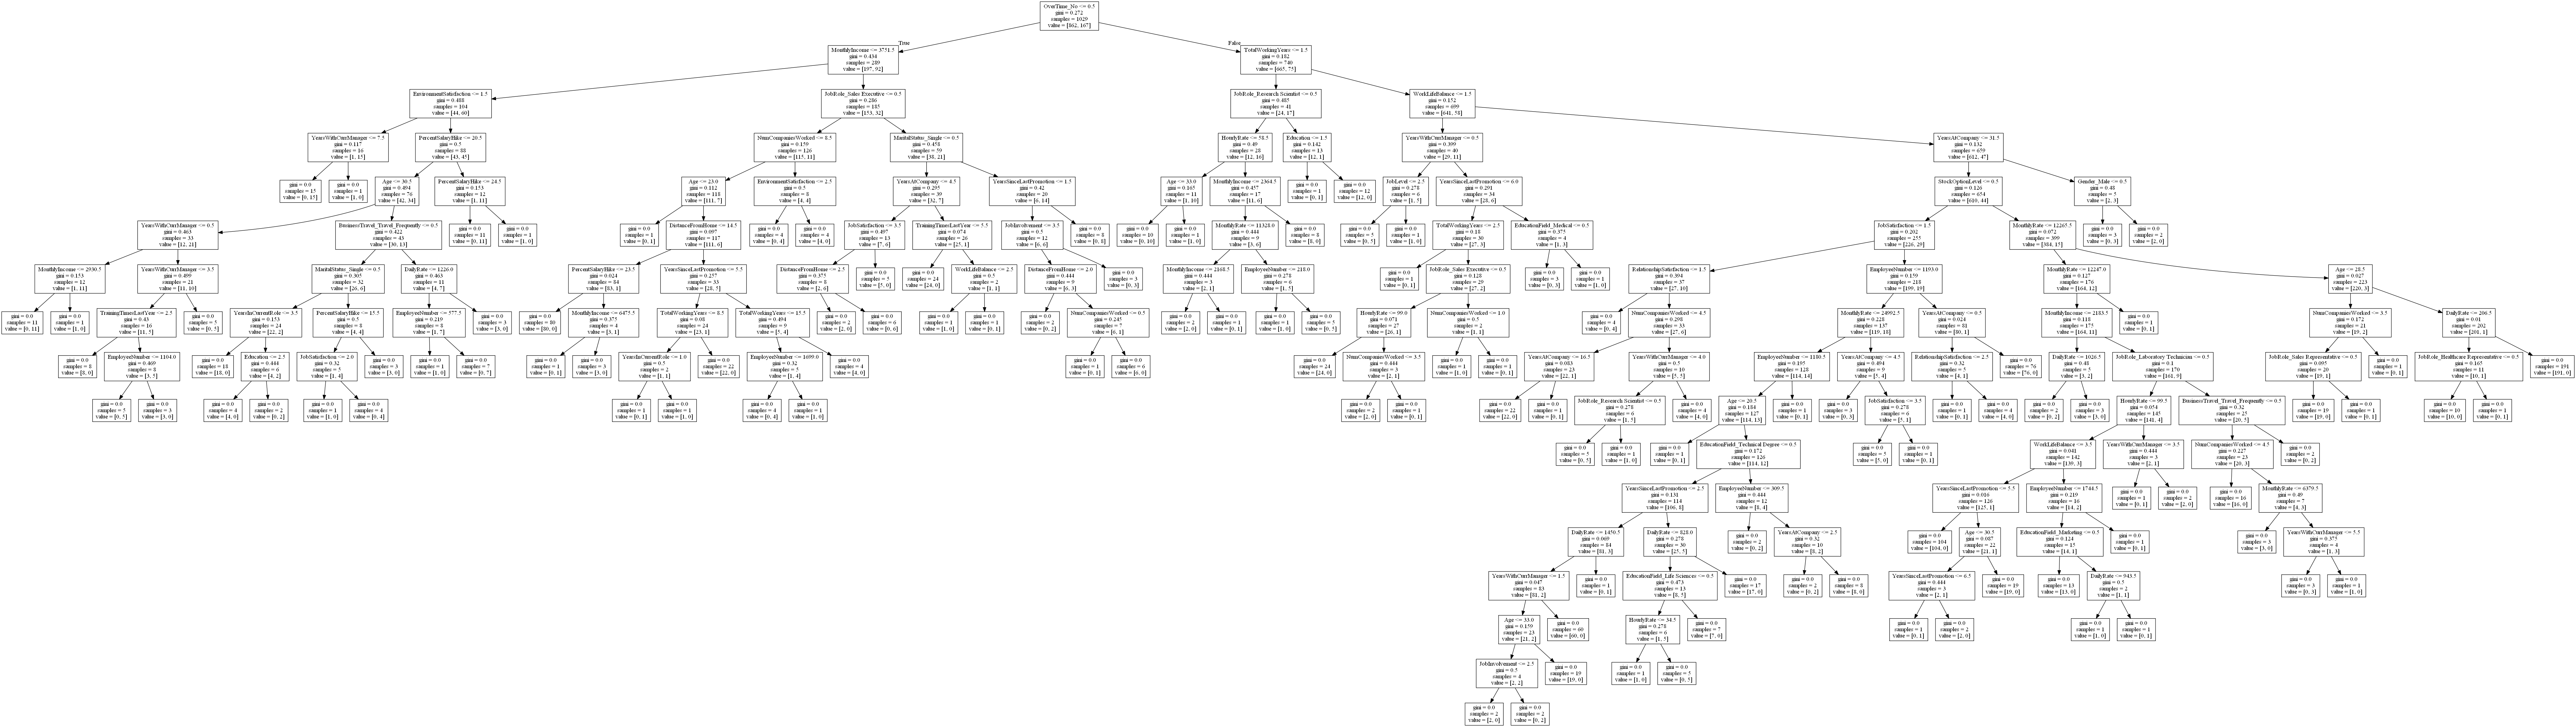

In [209]:
draw_tree(model,train_x.columns)

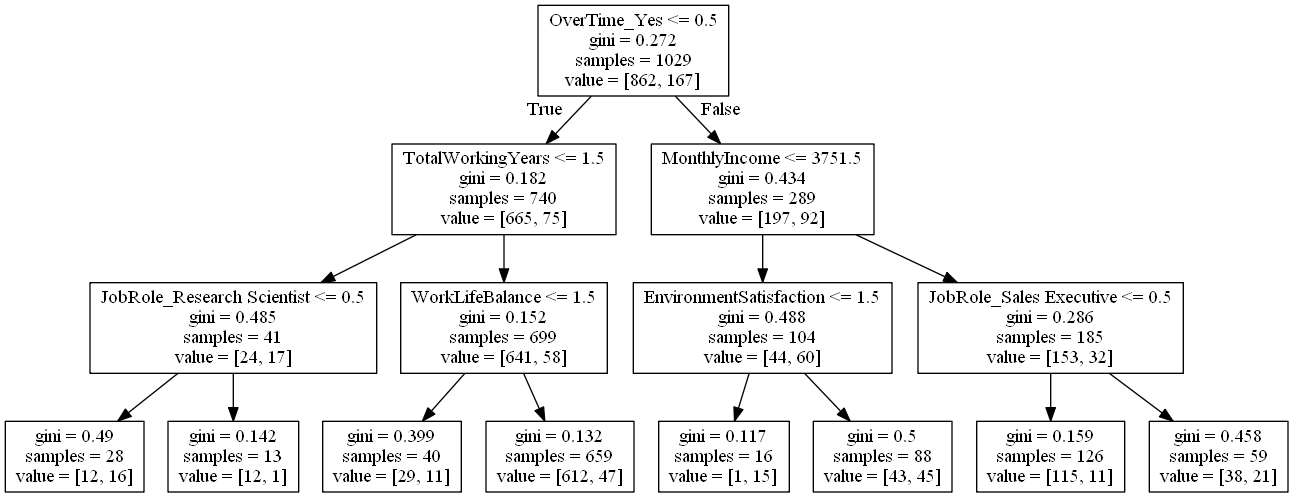

In [240]:
model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(train_x,train_y)
draw_tree(model2,train_x.columns)

In [241]:
l1=[3,1, 2,76,3]
l1.sort()
print(l1)

[1, 2, 3, 3, 76]


In [52]:
 test[['MonthlyIncome','OverTime_No']].head()

,MonthlyIncome,OverTime_No
880,2743,1
152,2306,0
1466,9991,1
1084,7083,0
1086,14411,0


In [52]:
pd.DataFrame(model2.predict_proba(test_x)).head()

,0,1
0,0.839695,0.160305
1,0.301887,0.698113
2,0.929432,0.070568
3,0.800000,0.200000
4,1.000000,0.000000


# Random Forest

In [88]:

all_cols =train.drop('Attrition',axis=1).columns
cols_used = all_cols[np.random.randint(1,len(all_cols),3)]
print(cols_used)

train_y =train['Attrition']
test_y = test['Attrition']


train_x=train[cols_used]
test_x=test[cols_used]

model = DecisionTreeClassifier(random_state=100)
model.fit(train_x,train_y)
pd.DataFrame(model.predict(test_x),index=test.index,columns=['Attrition Predicted'])

Index(['JobSatisfaction', 'EducationField_Technical Degree', 'OverTime_Yes'], dtype='object')


,Attrition Predicted
880,0
152,0
1466,0
1084,0
1086,0
1392,0
57,0
956,0
1400,0
1175,0


- no of trees in random forest - ntree
- no of columns in random forest - mtry -round(sqrt(D)) where d - no of columns in training data 
- These are called as hyper paraameters which improve performance
- These come under ENSEMBLE algorithms 
- ENSEMBLE  have BAGGING,BOOSTING,HYBRID,STRATIFIED GROUPING
- Random forest comes under BAGGING

#Decison Tree
- Single Tree
- All rows and columns are used
- Full tree will not be created
- Weak Learner
- Hyperparameters - gini impurity,entropy,maxdepth,min samples

#Random Forest
- Multiple Trees
- Subset of rows and columns are used
- Full tree will be created
- Strong Learner
- Hyperparameters - ntree,mtry

In [107]:
train_y =train['Attrition']
test_y =test['Attrition']

train_x=train.drop('Attrition',axis=1)
test_x=test.drop('Attrition',axis=1)

from sklearn.ensemble import RandomForestClassifier
model_rf =RandomForestClassifier(random_state=100)
model_rf.fit(train_x,train_y)

test_pred =model_rf.predict(test_x)
df_pred =pd.DataFrame({'actual':test_y,'predicted':test_pred})
df_pred['pred_status']=df_pred['actual'] == df_pred['predicted']
df_pred[df_pred['pred_status']==True].shape[0]/df_pred.shape[0] *100


85.71428571428571

# for bank data

In [143]:
bank =pd.read_csv('bank-full.csv',sep=';')
bank['y'].value_counts()
bank_temp=bank.drop('y',axis=1)
bank_dummies=pd.get_dummies(bank_temp)
bank_dummies['y']=bank['y']
train,test =train_test_split(bank_dummies,test_size=0.3,random_state=100)
train_y =train['y']
test_y = test['y']
train_x=train.drop('y',axis=1)
test_x=test.drop('y',axis=1)
model = DecisionTreeClassifier(random_state=100)
model.fit(train_x,train_y)
test_pred = model.predict(test_x)
df_pred = pd.DataFrame({'actual':test_y,'predicted':test_pred})
df_pred['pred_status']=df_pred['actual'] ==df_pred['predicted']
df_pred[df_pred['pred_status']==True].shape[0] / df_pred.shape[0] *100

87.72485992332645

In [238]:
train_y.shape

(31647,)

In [239]:
train_y[train_y=='no'].shape[0]

27937

In [240]:
train_y[train_y=='yes'].shape[0]

3710

In [132]:
1-np.square(27937/31647)-np.square(3710/31647)

0.20697532774991265

In [154]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [162]:
def func(a,b):
    if b==0:
        return a;
    else:
        return func((a&b)<<1)


In [164]:
5&6

4

In [163]:
print(func(5,6))

TypeError: func() missing 1 required positional argument: 'b'